# **Introdução ao Keras usando um backend do TensorFlow 2.0**
### **Treinamento de uma CNN simples no conjunto de dados MNIST - dígitos manuscritos**

Nesta lição, usamos o **Keras com um backend do TensorFlow 2.0** para criar um **modelo simples de rede neural convolucional** no PyTorch e treiná-lo para **reconhecer dígitos manuscritos no conjunto de dados MNIST**.
1. Carregando nosso conjunto de dados MNIST
2. Inspecionar nosso conjunto de dados 
3. Visualização do nosso conjunto de dados de imagens
5. Pré-processamento do nosso conjunto de dados
6. Criando nosso modelo
7. Treinamento do modelo
8. Plotagem dos registros de treinamento
9. Salvando e carregando nosso modelo
10. Testar nosso modelo em dados de teste

## Para utilizar o TensorFlow 2.11 no Windows !!

- Instale o WSL2
- Instale o conda/anaconda/miniconda
- crie um env
- Instale o CUDA toolkit para WSL
- instale seguindo as instruções link https://www.tensorflow.org/install/pip#windows-wsl2
- no env, instale pip install ipykernel
- no env, instale  pip install --upgrade psutil
- no env rode o comando para setar o kernel (AJUSTE A VERSÃO DO PYTHON NO COMANDO, CONFORME O INSTALADO NO ENV): python3.12 -m  ipykernel install --user --name=python3.12.8
- no env, instale o Jupyter (pip3 install jupyter)
- No VSCODE, abra um Terminal WSL
- Ative o env criado
- Rode o comando: jupyter-notebook

## **1. Carregando nossos dados**

Existem conjuntos de dados integrados do ```tensorflow.keras.datasets`` para carregar nossos dados. Usamos a função ```mnist.load_data()```.

Retorna: **2 tuplas**
- x_train, x_test: matriz uint8 de dados de imagem RGB com formato (num_samples, 3, 32, 32) ou (num_samples, 32, 32, 3) com base na configuração de backend image_data_format de channels_first ou channels_last, respectivamente.
- y_train, y_test: matriz uint8 de rótulos de categoria (inteiros no intervalo 0-9) com formato (num_samples, 1).

- Mais informações sobre os bancos de dados disponíveis em https://keras.io/datasets/


In [1]:
from tensorflow.keras.datasets import mnist

2025-09-19 03:49:51.083159: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-19 03:49:51.645498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758264591.843418     592 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758264591.894101     592 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758264592.321155     592 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
#Chegando se tem acesso a GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12070488533127194519
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5905580032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17901156027479027611
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1750368269.110555     450 gpu_device.cc:2019] Created device /device:GPU:0 with 5632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
# Mostrando o número de amostras em x_train, x_test, y_train, y_test
print("Dimensões em x_train: ", str(x_train.shape))

# Número de amostras em cada parte
print ("Número de amostras em nossos dados de treinamento: " + str(len(x_train)))
print ("Número de rótulos em nossos dados de treinamento: " + str(len(y_train)))
print ("Número de amostras em nossos dados de teste: " + str(len(x_test)))
print ("Número de rótulos em nossos dados de teste: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensões de um dado em x_train:" + str(x_train[0].shape))
print ("Labels em x_train:" + str(y_train.shape))
print("\n")
print ("Dimensões de um dado em x_test:" + str(x_test[0].shape))
print ("Labels em y_test:" + str(y_test.shape))

Dimensões em x_train:  (60000, 28, 28)
Número de amostras em nossos dados de treinamento: 60000
Número de rótulos em nossos dados de treinamento: 60000
Número de amostras em nossos dados de teste: 10000
Número de rótulos em nossos dados de teste: 10000


Dimensões de um dado em x_train:(28, 28)
Labels em x_train:(60000,)


Dimensões de um dado em x_test:(28, 28)
Labels em y_test:(10000,)


## **3. Visualizando nosso conjunto de dados de imagens**

Vamos dar uma olhada em algumas das imagens desse conjunto de dados
- Usando o OpenCV
- Usando o Matplotlib

In [5]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Imagem não encontrada")

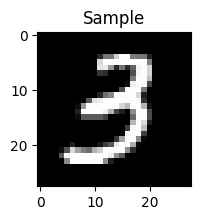

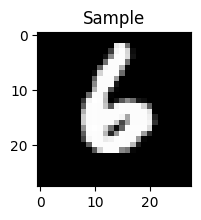

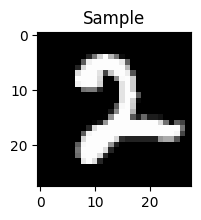

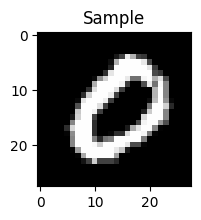

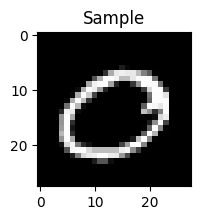

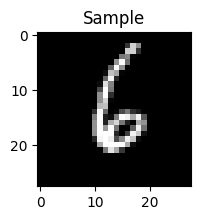

In [6]:
for i in range(0,6): #mostrando 6 random images
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

### Vamos fazer a mesma coisa, mas usando matplotlib para plotar 6 imagens**

<Figure size 640x480 with 0 Axes>

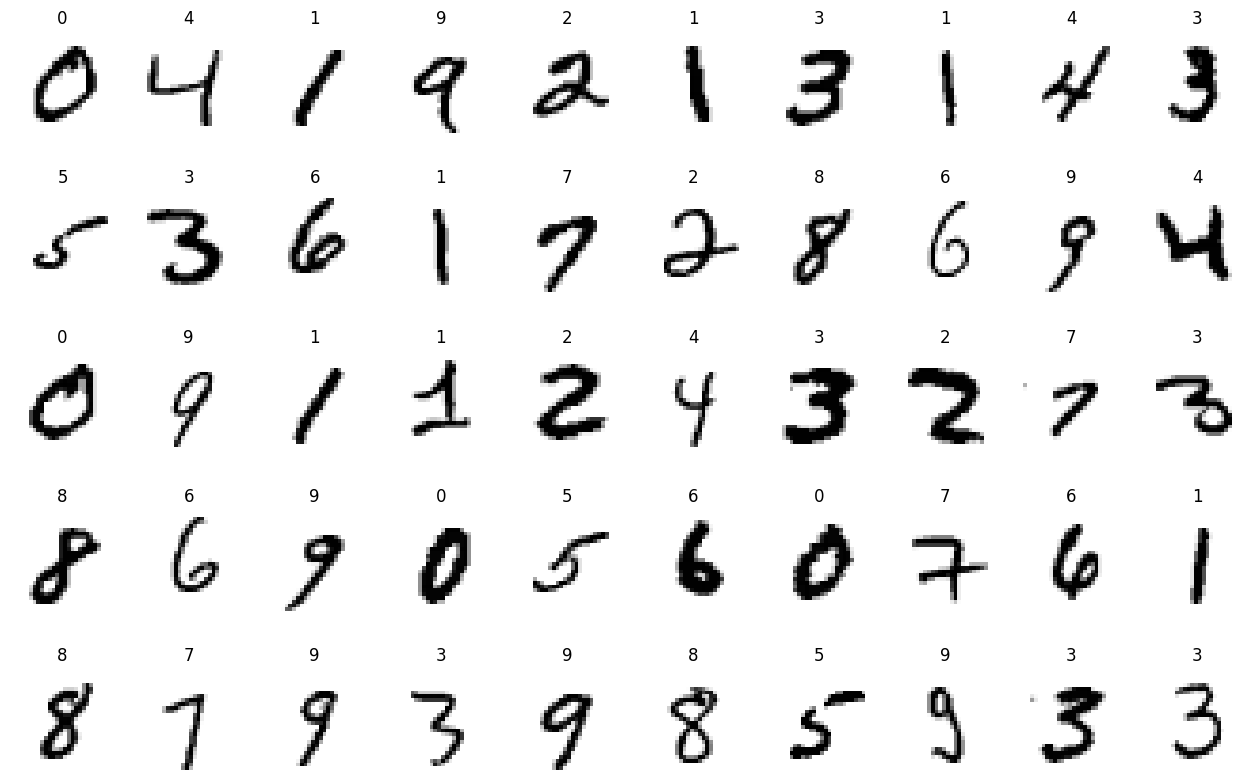

In [7]:
import matplotlib.pyplot as plt


figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 


for index in range(1, num_of_images + 1):
    #plotando 5 linhas com 10 imagens. Estamos também mostrando como título para cada uma, o rótulo verdadeiro
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}') 
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

## **4. Pré-processamento do nosso conjunto de dados** 

Antes de passar nossos dados para a CNN para treinamento, precisamos prepará-los primeiro. Isso inclui:
1. Remodelar nossos dados adicionando uma 4ª dimensão
2. Alterar o tipo de dados de uint8 para float32
3. Normalizar nossos dados para valores entre 0 e 1
4. Aplicar o One Hot Enconding

In [8]:

img_rows = x_train[0].shape[0] #Pegando a dimensão 28
img_cols = x_train[0].shape[1] #Pegando a dimensão 28

# Obtendo nossos dados na “forma” correta necessária para o Keras
# Precisamos adicionar uma quarta dimensão aos nossos dados, alterando assim nossa forma de imagem original de (60000,28,28) para (60000,28,28,1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1) #dimensões de uma unica imagem


x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalizar os valores de cada pixel para o intervalo de 0 a 1
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
print(img_rows, img_cols)

28 28


#### **One Hot Encode nos Labels (Y)**

Podemos implementar facilmente essa transformação usando ```to_categorical`` de ``` tensorflow.keras.utils``

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Contando o numero de colunas após aplicação do One Hot Encoder
print ("Número de classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Número de classes: 10


#### **Exemplo do One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

In [11]:
# Look at our raw data
print(f'Um dado {y_train[0]}')

Um dado [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **5. Criando nosso modelo**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)
- Estamos construindo uma CNN simples, mas eficaz, que usa 32 filtros de tamanho 3x3
- Adicionamos uma segunda camada CONV de 64 filtros do mesmo tamanho 3x3
- Em seguida, reduzimos a amostragem de nossos dados para 2x2
- Em seguida, achatamos nossa saída Max Pool que está conectada a uma camada Dense/FC que tem um tamanho de saída de 128
- Em seguida, conectamos nossas 128 saídas a outra camada FC/Dense que gera saídas para as 10 unidades categóricas


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

In [13]:
model = Sequential()

# Nossa primeira camada de convolução, tamanho do filtro 32, o que reduz o tamanho da camada para 26 x 26 x 32
# Usamos a ativação ReLU e especificamos nosso input_shape, que é 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Nossa segunda camada de convolução, filtro de tamanho 64, que reduz o tamanho da camada para 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# Usamos o MaxPooling com um tamanho de kernel de 2 x 2, o que reduz nosso tamanho para 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# Em seguida, fazemos o flatten do nosso objeto tensor antes de inseri-lo em nossa camada densa
# Uma operação de achatamento em um tensor remodela o tensor para ter a forma que é 
# igual ao número de elementos contidos no tensor
# Em nossa CNN, ele vai de (12 x 12 x 64) para (9216 x 1)
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Compilamos nosso modelo, o que cria um objeto que armazena o modelo que acabamos de criar
# Definimos nosso otimizador para usar o Stochastic Gradient Descent (taxa de aprendizado de 0,001)
# Definimos nossa função de perda como categorical_crossentropy, pois ela é adequada para problemas multiclasse
# Por fim, as métricas (o que avaliamos em nosso desempenho) é a precisão.

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

# Podemos usar a função de resumo para exibir as camadas e os parâmetros do nosso modelo
print(model.summary())

#CALCULO DOS PARAMETROS: (ALTURA * LARGURA * PROFUNDIDADE + 1) * NUMERO DE KERNELS DA CAMADA
#NOTE QUE O NUMERO 320, É O RESULTADO DA CONTA (3X3X1+1) X 32 = 320
#NOTE QUE O NUMERO É 18,496, É O RESULTADO DA CONTA (3X3X32+1) X 64 = 18,496
# NA CAMADA DENSA - (9216 + 1) × 128 = 1,179,776



/home/gabs/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750368270.678134     450 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
y_test.shape

(10000, 10)

## **6. Treinamento do nosso modelo**
- Nossos dados pré-processados são usados como entrada
- Definimos o tamanho do lote como 128 (ou qualquer número entre 8 e 256 é bom)
- Definimos o número de épocas como 25; isso é apenas para fins deste tutorial, mas um valor de pelo menos 10 deve ser usado
- Armazenamos os resultados do treinamento do nosso modelo para plotagem no futuro
- Em seguida, usamos a função molel.evaluate do Keras para gerar o desempenho final do modelo. Aqui estamos examinando a perda de teste e a precisão do teste

In [15]:
batch_size = 128
epochs = 25

# Armazene nossos resultados aqui para que possamos plotar mais tarde
# Em nossa função de ajuste, especificamos nossos conjuntos de dados (x_train e y_train), 
# o tamanho do lote (normalmente de 16 a 128, dependendo de sua RAM), o número de 
# épocas (geralmente de 10 a 100) e nossos conjuntos de dados de validação (x_test e y_test)
# verbose = 1, define nosso treinamento para gerar métricas de desempenho a cada época

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# Obtemos nossa pontuação de precisão usando a função evalute
# A pontuação contém dois valores, nossa perda de teste e a precisão
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25


I0000 00:00:1750368272.554593     547 service.cc:152] XLA service 0x77447c006cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750368272.554620     547 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-06-19 18:24:32.634073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750368272.767724     547 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-19 18:24:33.629339: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_140', 4 bytes spill stores, 4 bytes spill loads

2025-06-19 18:24:34.848785: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 13

 27/469 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1057 - loss: 2.3049

I0000 00:00:1750368278.005220     547 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2173 - loss: 2.2610

2025-06-19 18:24:41.942867: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 784 bytes spill stores, 784 bytes spill loads

2025-06-19 18:24:42.075599: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_320', 88 bytes spill stores, 88 bytes spill loads

2025-06-19 18:24:42.277355: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 496 bytes spill stores, 496 bytes spill loads

2025-06-19 18:24:42.471708: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 476 bytes spill stores, 440 bytes spill loads

2025-06-19 18:24:42.632089: I external

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.2178 - loss: 2.2607 - val_accuracy: 0.5527 - val_loss: 2.0469
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6316 - loss: 1.8483 - val_accuracy: 0.8096 - val_loss: 0.9502
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8235 - loss: 0.7861 - val_accuracy: 0.8735 - val_loss: 0.4927
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8656 - loss: 0.4873 - val_accuracy: 0.8937 - val_loss: 0.3917
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8892 - loss: 0.3930 - val_accuracy: 0.9036 - val_loss: 0.3477
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8983 - loss: 0.3545 - val_accuracy: 0.9102 - val_loss: 0.3193
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9055 - loss: 0.3298 - val_accuracy: 0.9146 - val_loss: 0.2995
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9068 - loss: 0.3143 - val_accuracy: 0.9178 - va

2025-06-19 18:25:53.673669: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads



Test loss: 0.1744212508201599
Test accuracy: 0.9490000009536743


## **7. Plotando nossos gráficos de perda e precisão**

In [16]:
history_dict = history.history
history_dict

{'accuracy': [0.34283334016799927,
  0.6950833201408386,
  0.8359666466712952,
  0.8744666576385498,
  0.8900499939918518,
  0.8991666436195374,
  0.9054666757583618,
  0.9092333316802979,
  0.9137166738510132,
  0.916616678237915,
  0.9197499752044678,
  0.9228166937828064,
  0.9254999756813049,
  0.9284499883651733,
  0.9306166768074036,
  0.9323999881744385,
  0.9343666434288025,
  0.9362499713897705,
  0.9375,
  0.9399166703224182,
  0.9407833218574524,
  0.9424833059310913,
  0.9437333345413208,
  0.9453166723251343,
  0.9470166563987732],
 'loss': [2.204010486602783,
  1.5804595947265625,
  0.6754783987998962,
  0.4543401598930359,
  0.3862183392047882,
  0.3503916561603546,
  0.3268043100833893,
  0.30916619300842285,
  0.2953733801841736,
  0.2835884094238281,
  0.2733027935028076,
  0.2637692987918854,
  0.2549317181110382,
  0.24674808979034424,
  0.23891803622245789,
  0.23191596567630768,
  0.22522328794002533,
  0.21902400255203247,
  0.21316714584827423,
  0.2072667181491

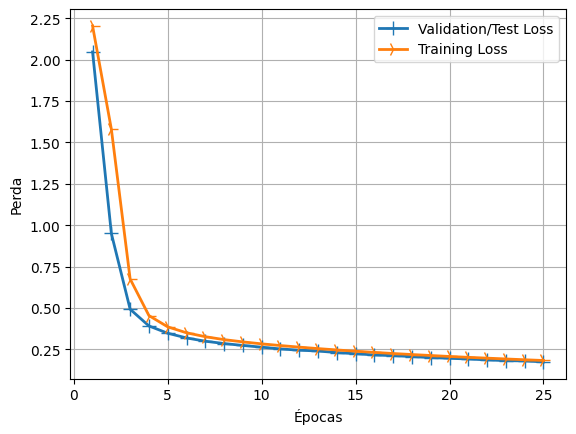

In [17]:
# Plotagem de nossos gráficos de perdas
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Obtenha o número de épocas e crie uma matriz até esse número usando range()
epochs = range(1, len(loss_values) + 1)

# Plote gráficos de linha para a perda de validação e treinamento
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Épocas') 
plt.ylabel('Perda')
plt.grid(True)
plt.legend()
plt.show()

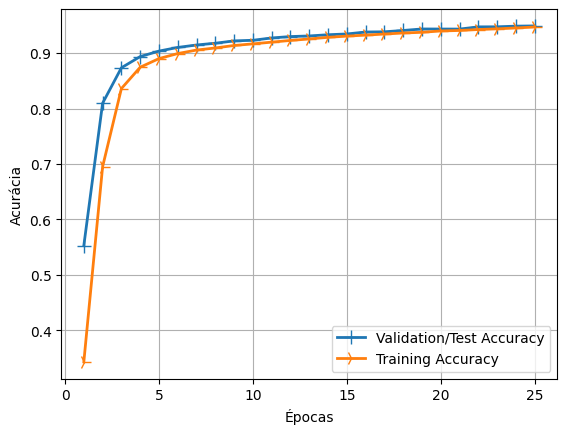

In [18]:
#GRAFICO DA ACURÁCIA

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend()
plt.show()

## **8. Salvando e carregando nosso modelo**

**Salvar o nosso modelo é simples, basta usar:**

 ```model.save(“nome_do_arquivo_do_modelo.h5”)```

In [19]:
model.save("mnist_simple_cnn_25_Epochs.h5")
print("Model Saved")

Model Saved


## Carregando o modelo

In [20]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_25_Epochs.h5')

## **9. Obtendo previsões de nossos dados de teste de amostra**

**Previsão de todos os dados de teste**

In [21]:
print(x_test.shape)

print("Previsão de classes para todos os 10,000 dados de teste...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completado.\n")

print(pred)
print(type(pred)) #Retorna um ARRAY NUMPY 
print(len(pred))

(10000, 28, 28, 1)
Previsão de classes para todos os 10,000 dados de teste...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completado.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


### **Agora vamos fazer algo sofisticado, vamos colocar o rótulo previsto em uma imagem com a imagem de dados de teste**

In [22]:
# Recarregar nossos dados, já que os redimensionamos

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


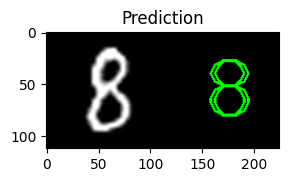

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


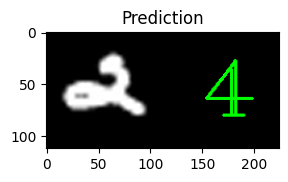

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


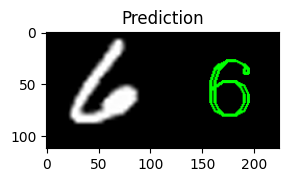

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


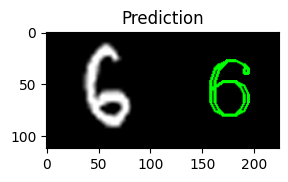

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


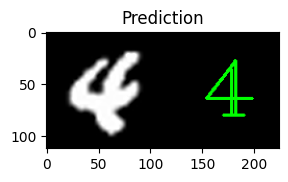

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


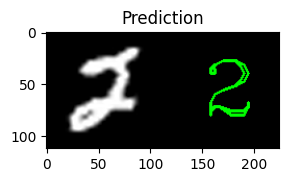

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


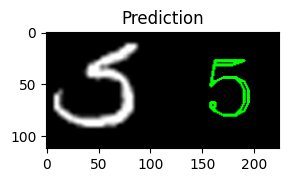

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


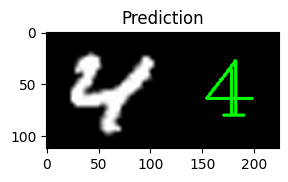

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


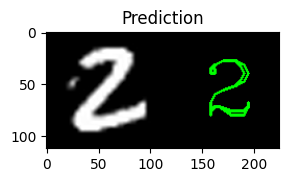

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


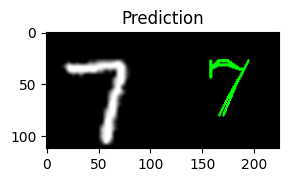

In [23]:
def draw_test(name, pred, input_im):  
    '''Função que coloca a classe prevista ao lado da imagem original'''
    # Crie nosso plano de fundo preto
    BLACK = [0,0,0]
    # Expandimos nossa imagem original para a direita para criar espaço para colocar nosso texto de classe previsto
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # converter nossa imagem em escala de cinza em colorida
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Coloque nosso texto de classe previsto em nossa imagem expandida
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    #Obtenha uma imagem de dados aleatórios do nosso conjunto de dados de teste 
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Crie uma imagem maior redimensionada para conter nosso texto e permitir uma exibição maior
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reformular nossos dados para que possamos inseri-los (propagar para frente) em nossa rede
    input_im = input_im.reshape(1,28,28,1) 
    
    # Obtenha a previsão, use [0] para acessar o valor na matriz numpy, pois ela está armazenada como uma matriz
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Coloque o rótulo na imagem de nossa amostra de dados de teste
    draw_test("Prediction", res,  np.uint8(imageL)) 